### Performing EDA on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
try:
    df = pd.read_csv("D:/BrowserDownloads/eda datasets/titanic_train.csv")
    print('file found')
except FileNotFoundError:
    print('file not found')

file found


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.rename(columns={'Sex': "Gender"})

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
(df.isnull().sum()/ len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

observation : we can see that around 19% of the data is missing in the AGE col. it can be covered through imputation.
while CABIN is missing 77% of the data , whcih means its useless , because more than 50 % of the data unavailable , which tell's us to drop it.

<Axes: >

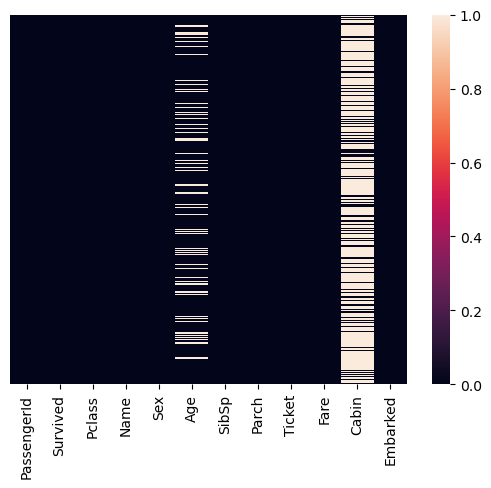

In [7]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= 'virdis')

In [8]:
cols_with_empty_values = [feature for feature in df.columns if df[feature].isnull().sum() > 0] #cols with missing values 
cols_with_empty_values

['Age', 'Cabin', 'Embarked']

In [9]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
numerical_cols = [col for col in df.columns if df[col].dtype == 'int64']
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [12]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']
object_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
passenger_count = df.groupby(['Survived'])['PassengerId'].size()
passenger_count

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [15]:
(passenger_count / len(df)) * 100

Survived
0    61.616162
1    38.383838
Name: PassengerId, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

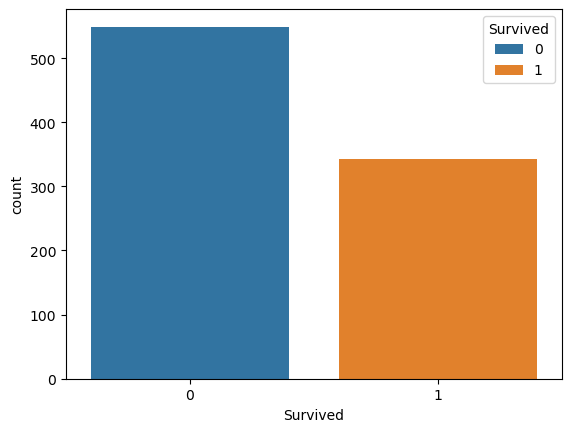

In [16]:
sns.countplot(x = 'Survived', data = df, stat='count', hue='Survived')

observation: as per my observation , 342 survived from titanic and remaining did not 

<Axes: xlabel='Survived', ylabel='percent'>

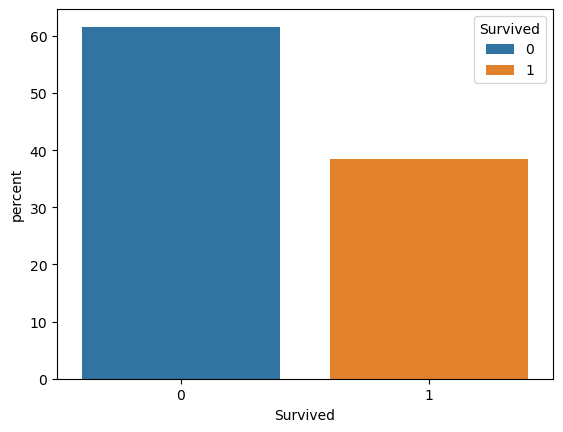

In [17]:
sns.countplot(x = 'Survived', data = df, stat='percent', hue= 'Survived') #its just showing how many zero's and how many one's are there in the entire dataframe

In [18]:
df.columns
# out of the survived passengers how many were male and female

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
Survival_by_gender = df.groupby(['Survived', 'Sex']).size().reset_index()
Survival_by_gender.rename(columns={0: 'Value'})
Survival_by_gender

,Survived,Sex,0
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


<Axes: xlabel='Survived', ylabel='percent'>

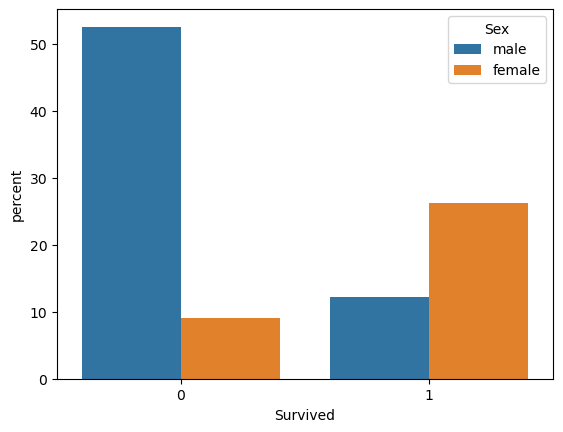

In [20]:
sns.countplot(x= 'Survived', data= df, hue= 'Sex', stat= 'percent')

In [21]:
data = df.groupby(['Survived', 'Sex', 'Pclass']).size().reset_index().rename(columns={0: "count"})
data

,Survived,Sex,Pclass,count
0,0,female,1,3
1,0,female,2,6
2,0,female,3,72
3,0,male,1,77
4,0,male,2,91
5,0,male,3,300
6,1,female,1,91
7,1,female,2,70
8,1,female,3,72
9,1,male,1,45


<Axes: xlabel='Survived', ylabel='percent'>

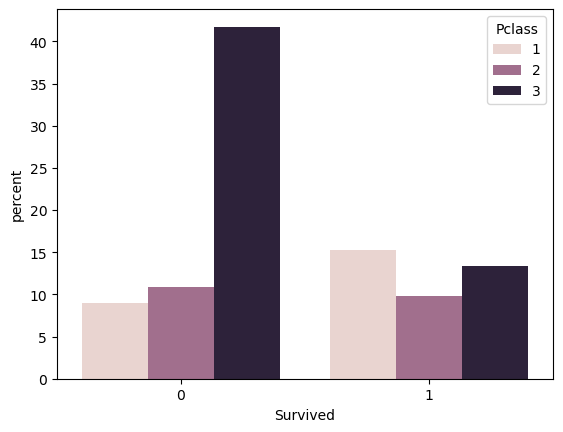

In [22]:
sns.countplot(data = df, x = 'Survived', hue = 'Pclass', stat='percent' )

In [23]:
Class = pd.DataFrame({
    'Pclass': [1,2,3],
    'Category': ['Higher', 'Middle', 'Lower']
})

In [24]:
Class

,Pclass,Category
0,1,Higher
1,2,Middle
2,3,Lower


In [25]:
final_df = df.merge(Class, on = 'Pclass', how='left')

In [26]:
final_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Lower
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Higher
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Higher
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Middle
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Higher
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Lower
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Higher


<Axes: xlabel='Survived', ylabel='percent'>

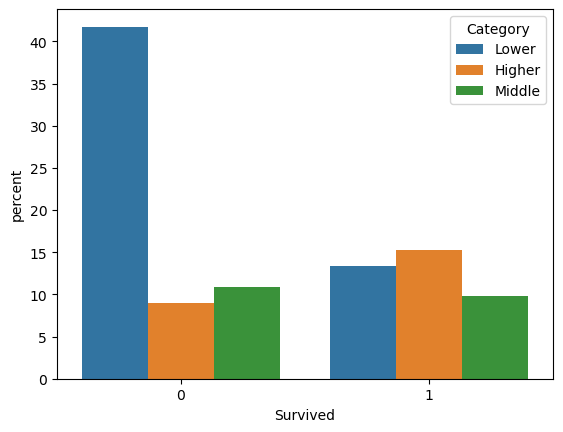

In [27]:
sns.countplot(data = final_df, x = 'Survived', hue = 'Category', stat='percent' )

In [28]:
# from the lower pclass how many of them were male and how many female who died

died_df = final_df[final_df['Survived'] == 0]
died_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Lower
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Lower
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Lower
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Higher
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Lower
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Lower
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Middle
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Lower


In [29]:
died_df.groupby(['Category', 'Sex']).size().reset_index()

,Category,Sex,0
0,Higher,female,3
1,Higher,male,77
2,Lower,female,72
3,Lower,male,300
4,Middle,female,6
5,Middle,male,91


<Axes: xlabel='Sex', ylabel='percent'>

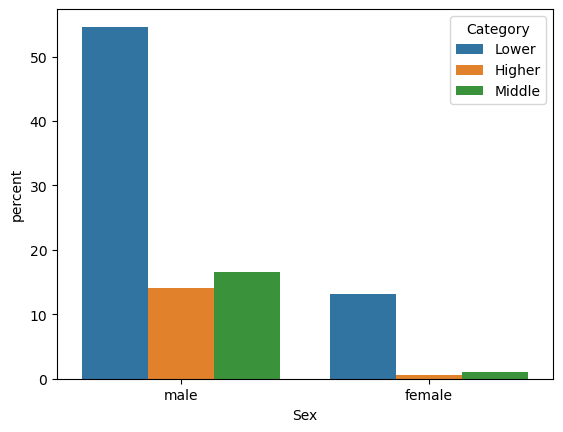

In [30]:
sns.countplot(data = died_df, x= 'Sex', hue= 'Category', stat='percent')

In [31]:
#parch is basically the kids and #Sibsp , are siblings and spouse of that person
#how many siblings 
final_df.groupby(['Survived','SibSp']).size()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

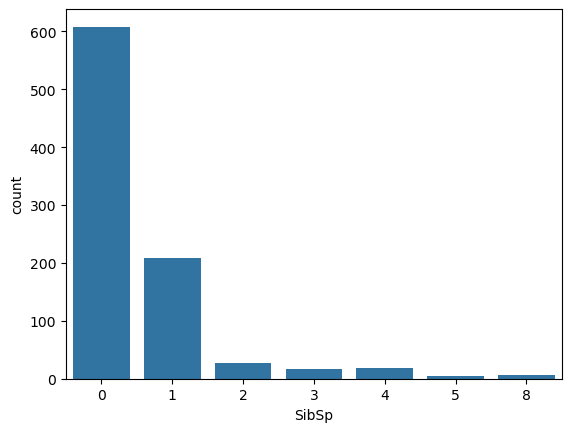

In [32]:
sns.countplot(data = final_df, x= 'SibSp')

Observation:
More than 50% of the males died from the lower class
this shows men are more sacrficing , more loyal than women ever were

we have only touched those series and dataframes where there were no null values or NaN values , so we need to do something about those NaN values 

We have made a good amount of observation with regards to the survival , now we need to head towards another direction

In [33]:
final_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Category'],
      dtype='object')

In [34]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [35]:
final_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Lower
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Higher
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Higher
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Lower


In [36]:
final_df['Age'].isnull().sum()

np.int64(177)

<Axes: xlabel='Age', ylabel='Count'>

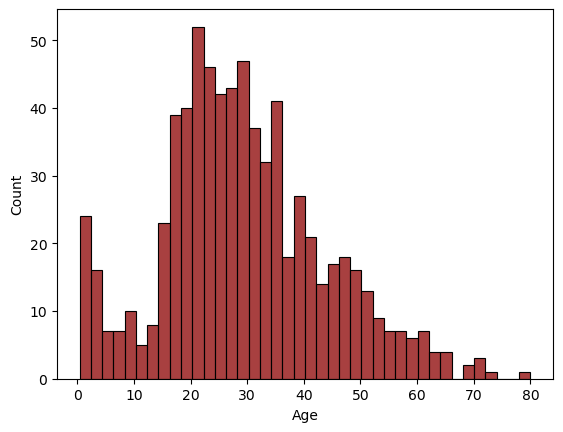

In [37]:
sns.histplot(final_df['Age'].dropna(axis = 0), kde = False, color='darkred', bins=40 )

<Axes: >

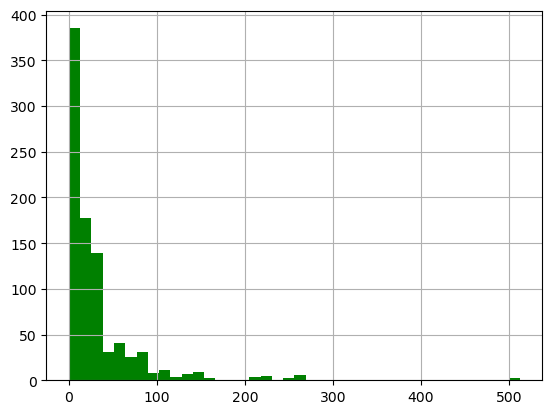

In [38]:
final_df.Fare.hist(color = 'green', bins = 40 )

### Data Cleaning

we figured out that there are 2 columns that need's to be cleaned , or which has a lot of null values , i suggest we find out the null values and imputate them, later head on for outliers 

In [39]:
numerical_df = df[numerical_cols]

In [40]:
final_df['Age'].dtype

dtype('float64')

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Category     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [42]:
final_df.groupby(['Pclass','Age']).size().sort_values()

Pclass  Age  
1       0.92      1
        2.00      1
        4.00      1
        11.00     1
        14.00     1
                 ..
3       19.00    14
        20.00    15
        18.00    16
        21.00    17
        22.00    20
Length: 182, dtype: int64

In [43]:
numerical_cols_2 = [i for i in final_df.columns if final_df[i].dtype in ['int64', 'float64']]
numerical_cols_2

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [44]:
final_df[numerical_cols_2]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


before performing imputation to age column , we first find the relationship between the Pclass and age, so there is a relationship between the age col and Passenger class , idont know how did krishnaik did it , but i tried creating a group by function on the pclass w.r.t the average age .

the goal is to check if the numerical cols have good relationship

In [45]:
final_df[final_df['Pclass'] == 3][['Age', 'Pclass']].sort_values('Pclass')

,Age,Pclass
870,26.0,3
869,4.0,3
868,NaN,3
863,NaN,3
860,41.0,3
...,...,...
884,25.0,3
885,39.0,3
888,NaN,3
890,32.0,3


In [46]:
final_df.groupby(['Pclass'])['Age'].mean().reset_index()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


<Axes: xlabel='Pclass', ylabel='Age'>

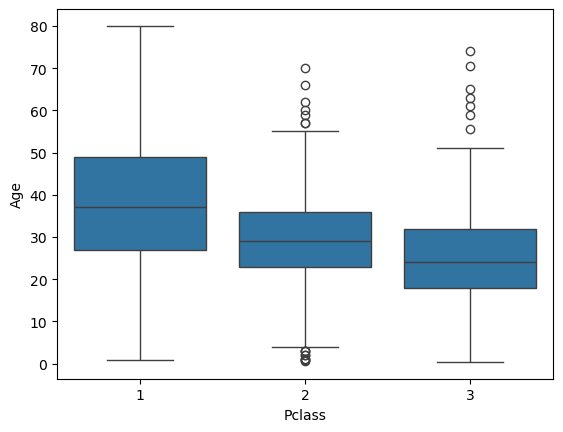

In [47]:
sns.boxplot(data= final_df,x='Pclass' , y = 'Age')

box plot was only used to check the mean of the age column , not remove the outliers


In [48]:
def input_age(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return age


In [49]:
final_df['Age'] = final_df[['Age', 'Pclass']].apply(input_age, axis = 1)

C:\Users\moham\AppData\Local\Temp\ipykernel_2492\949053848.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\moham\AppData\Local\Temp\ipykernel_2492\949053848.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

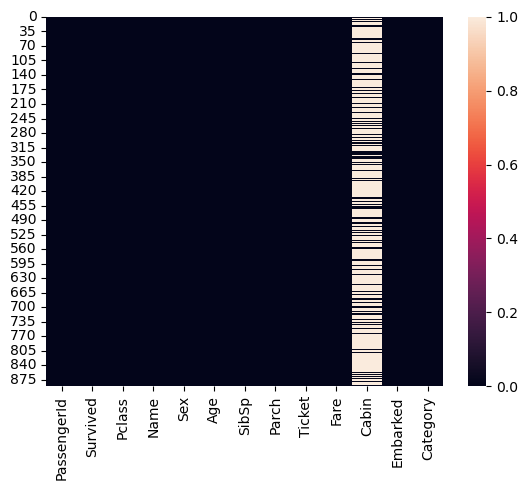

In [50]:
sns.heatmap(final_df.isnull())

after applying the function , we can see the heatmap , age has no null values


In [51]:
final_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Category'],
      dtype='object')

In [52]:
final_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Category'],
      dtype='object')

<Axes: >

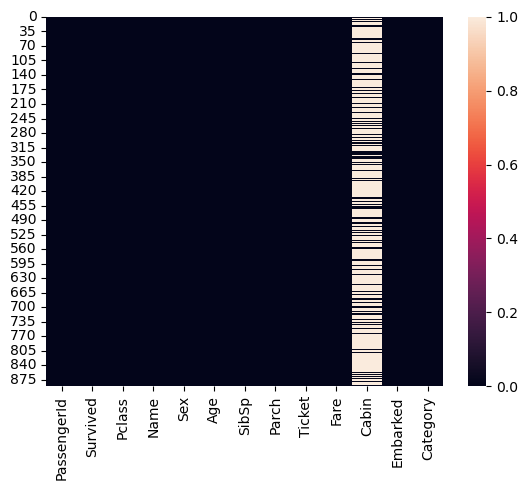

In [53]:
sns.heatmap(final_df.isnull())

In [54]:
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [55]:
final_df.drop('Cabin', axis= 1, inplace=True)

<Axes: >

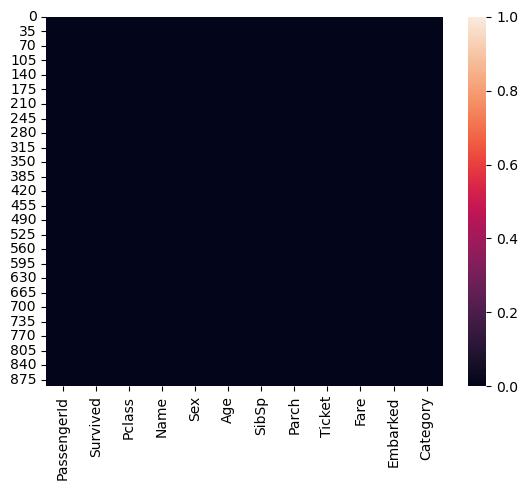

In [56]:
sns.heatmap(final_df.isnull())

In [57]:
numerical_cols_2

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [58]:
numerical_df = final_df[numerical_cols_2]

In [59]:
correlation_matrix = numerical_df.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035388,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050118,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403923,0.083081,0.018443,-0.549500
Age,0.035388,-0.050118,-0.403923,1.000000,-0.243110,-0.174824,0.121503
SibSp,-0.057527,-0.035322,0.083081,-0.243110,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.174824,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.121503,0.159651,0.216225,1.000000


In [60]:
numerical_df_2 = final_df.select_dtypes(include=['number'])
numerical_df_2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,25.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


Now that the data is cleaned. These steps include feature engineering , model selection , model training , model evaluation , and model deployment . We will discuss each of these steps in the following chapters.

### Feature engineering

In [61]:
final_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Lower
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Higher
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Lower
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Higher
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Lower


for a ml problem, we need to predict the survival rate. Now we need to select the relevant features necessary to perform such task.<br>
Features like:
1. Passenger ID
2. Name
3. ticket

they are not important and to be removed

### Converting categorical features 
Before removing them , note down categorical features such as:
1. Survived[2 categories]
2. Pclass[3 categories]
3. Embarked [3 categories]
4. Sex [2 categories]
5. Sibsp[2 categories]


We need to convert these categorical columns into dummy variables for the ml algorithm to preprocess the data. We will use pandas get_dummies function to achieve this.

In [62]:
sex = pd.get_dummies(final_df['Sex'], drop_first= True)
embark = pd.get_dummies(final_df['Embarked'], drop_first= True)

In [63]:
print(sex)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[891 rows x 1 columns]


In [64]:
final_df.drop(['Sex', 'Embarked','PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)

In [65]:
final_df.drop(['Category'], axis=1, inplace=True)

In [66]:
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [67]:
print(type(sex))
print(type(embark))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [68]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [69]:
final_df = pd.concat([final_df, sex, embark], axis = 1)

In [70]:
final_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

Great! , now our data is ready for the model

In [71]:
def convert(col):
    return col.astype(int)
        
final_df[['male', 'Q', 'S']] = final_df[['male', 'Q', 'S']].apply(convert, axis = 1)

In [72]:
final_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


Divide data into dependent and independent features 
1. Survived : dependent variable
2. Pclass, Age, Sex, SibSp, Parch, Fare : independent variables

In [73]:
X = final_df.drop('Survived', axis = 1)  #independent variables

In [74]:
y = final_df['Survived'] #dependent variables

In [75]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [76]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

d:\Anaconda\envs\myenvironment\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
prediction = logmodel.predict(X_test)

In [78]:
prediction.size

179

In [79]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
709,3,25.0,1,1,15.2458,1,0,0
439,2,31.0,0,0,10.5000,1,0,1
840,3,20.0,0,0,7.9250,1,0,1
720,2,6.0,0,1,33.0000,0,0,1
39,3,14.0,1,0,11.2417,0,0,0
...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,1,0,1
773,3,25.0,0,0,7.2250,1,0,0
25,3,38.0,1,5,31.3875,0,0,1
84,2,17.0,0,0,10.5000,0,0,1


In [80]:
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [81]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [82]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test, prediction)
accuracy

array([[90, 15],
       [20, 54]])

In [83]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , prediction)
print(score)

0.8044692737430168


## Summary

The model predicts with an accuracy of 80% , the model accurately predicts the survival rate of passengers traveling on titanic based on predfined dataset.
We initially started with importing the data.
1. We performed EDA. 
   - eda gave us the outliers, missing values, and the distribution of the data.
   - useless features were also found
   - we found the trends and patterns in the data.
   - most importantly we familiarized ourselves with the data.
   - we did data visualization
2. data preprocessing
   - we found variables that were not useful for the model
   - we removed the useless features
   - we encoded the categorical variables
   - we performed correlation between numerical cols 
3. Model Training
   - we used logistic regression model
   - we used cross validation to evaluate the model
   - we used accuracy score to evaluate the model ,<br>
  The model was trained with an accuracy of 80% and it was able to predict the survival ratio